In [1]:
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd

sns.set_theme()


In [54]:
import numpy as np
from scipy.special import gamma, gammainc
from scipy.stats import uniform


def sz_distribution_inverse_transform(Mn, PDI, size=1):
  """
  Generates molecular weights from the Schulz-Zimm distribution 
  using inverse transform sampling with the Newton-Raphson method.

  Args:
    Mn: Number-average molecular weight.
    PDI: Polydispersity index.
    size: Number of molecular weights to generate.

  Returns:
    An array of molecular weights.
  """
  z = 1 / (PDI - 1)
  u = uniform.rvs(size=size)

  def sz_cdf(x):
    return gammainc(z + 1, (z + 1) * x / Mn)

  def sz_cdf_derivative(x):
    return ((z + 1) / Mn) * ((z + 1) * x / Mn)**z * np.exp(-(z + 1) * x / Mn) / gamma(z + 1)

  molecular_weights = np.zeros(size)
  for i in range(size):
    x = Mn  # Initial guess
    tolerance = 1e-6
    max_iterations = 100
    for _ in range(max_iterations):
      x_next = x - (sz_cdf(x) - u[i]) / sz_cdf_derivative(x)
      if abs(x_next - x) < tolerance:
        break
      x = x_next
    molecular_weights[i] = x

  return molecular_weights

In [55]:
PDI = 1.1
Mn = 100
r = sz_distribution_inverse_transform(Mn, PDI, 10000)

In [56]:
r.shape

(10000,)

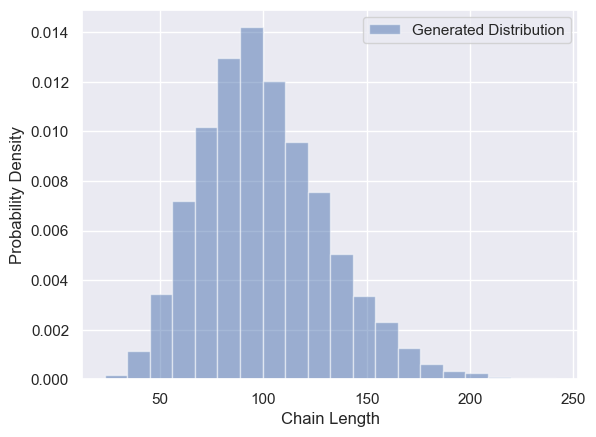

In [57]:
from scipy.stats import gamma

plt.hist(r, bins=20, density=True, alpha=0.5, label="Generated Distribution")
# X-Axis is the logarithim of the size
# plt.xscale('log')

# Plot histogram
# Plot theoretical Schulz-Zimm distribution
# x = np.linspace(min(r), max(r), 100)
# z = 1 / (PDI - 1)
# sz_dist = gamma.pdf(x, a=z+1, scale=Mn/(z+1)) 
# plt.plot(x, sz_dist, label="Theoretical S-Z Distribution")

plt.xlabel("Chain Length")
plt.ylabel("Probability Density")
plt.legend()
plt.show()
